# Ejercicio 7

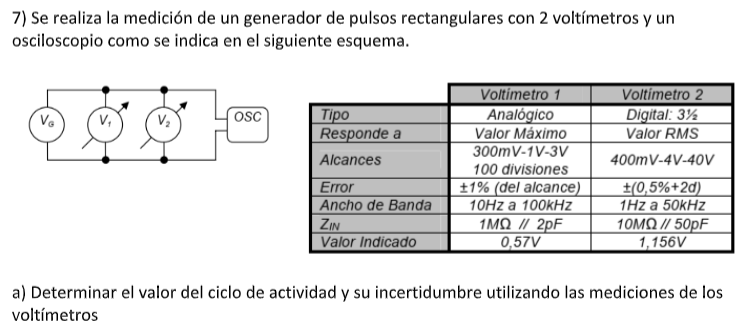

Siendo el valor indicado del voltimetro 1:

$$
S_{i1} = S_{pp}~.~(1 - \delta)~.~\frac{1}{\sqrt{2}}~~~~~~~~con~\delta = \frac{\tau}{T}
$$

Siendo el valor indicado del voltimetro 2:

$$
S_{i2} = S_{pp}~.~\sqrt{(1 - \delta)~.~\delta}
$$

Siendo el cociente de los valores indicados de los voltimetros 1 y 2:

$$
\frac{S_{i1}}{S_{i2}} = \frac{S_{pp}~.~(1 - \delta)~.~\frac{1}{\sqrt{2}}}{S_{pp}~.~\sqrt{(1 - \delta)~.~\delta}} = \frac{(1 - \delta)}{\sqrt{2}~.~\sqrt{(1 - \delta)~.~\delta}}
$$

$$
\frac{S_{i1}^2}{S_{i2}^2} = \frac{(1 - \delta)^2}{2~.~(1 - \delta)~.~\delta} = \frac{1 - \delta}{2~.~\delta}
$$

$$
\frac{S_{i1}^2}{S_{i2}^2}~.~2~.~\delta = 1 - \delta~~\to~~\frac{S_{i1}^2}{S_{i2}^2}~.~2~.~\delta + \delta = 1~~\to~~\delta~.~(2~.~\frac{S_{i1}^2}{S_{i2}^2} + 1) = 1
$$

$$
\delta = \frac{1}{2~.~\frac{S_{i1}^2}{S_{i2}^2} + 1}
$$

In [6]:
from math import pi, sqrt

SI = [0.57, 1.156]

delta = 1 / (2 * ( SI[0] ** 2 / SI[1] ** 2 ) + 1)

print("El ciclo de actividad es: {} %".format(delta * 100))

El ciclo de actividad es: 67.28320719225673 %


Calculando el error tipo B del voltimetro 1:

$$
u_j(S_{i1}) = \frac{a_1}{\sqrt{3}}~~~~~~~~~~a_1 = \Delta V_1 .err\%_1
$$

In [2]:
ERR1 = 0.01

a1 = SI[0] * ERR1
uj_s1 = a1 / sqrt(3)

print("El error tipo B del voltrimetro 1 es: {} V".format(uj_s1))

El error tipo B del voltrimetro 1 es: 0.0032908965343808666 V


Calculando el error tipo B del voltimetro 2:

$$
u_j(S_{i2}) = \frac{a_2}{\sqrt{3}}~~~~~~~~a_2 = \Delta V_2 .err_2\%~~~~~~~~err_2\% = err_{med2}\% + err_{cont2}
$$

$$
err_{cont2}\% = \frac{total~de~conteos}{valor~de~cuentas~del~instrumento}~.~100\%
$$

In [12]:
CONTEOS = 2
CUENTAS = 1156
ERR_MED = 0.5

err_c = CONTEOS * 100 / CUENTAS 
err2 = ERR_MED + err_c

a2 = SI[1] * err2 / 100
uj_s2 = a2 / sqrt(3)

print("El error tipo B del voltrimetro 2 es: {} V".format(uj_s2))

El error tipo B del voltrimetro 2 es: 0.004491785094295288 V


Siendo el cuadrado de la incertidumbre combinada:

$$
u_{c}^2(y) = \sum_{i=1}^{N} (\frac{\partial f}{\partial x_i})^2~.~u^2(x_i)~+~2\sum_{i=1}^{N-1}\sum_{j=i+1}^{N}\frac{\partial f}{\partial x_i}\frac{\partial f}{\partial x_j}~.~u(x_i, x_j)
$$

$$
\delta = \frac{1}{2~.~\frac{S_{i1}^2}{S_{i2}^2} + 1} = \frac{S_{i2}^2}{2~.~S_{i1}^2 + S_{i2}^2}
$$

Calculando la incertidumbre combinada de $\delta$ al cuadrado:

$$
U^2_c(\delta) = (\frac{- 4~.~S_{i1}~.~S^2_{i2}}{(2~.~S_{i1}^2 + {S_{i2}^2})^2})^2~.~u^2_c(S_{i1})~~+~~(\frac{4~.~S^2_{i1}~.~S_{i2}}{(2~.~S_{i1}^2 + {S_{i2}^2})^2})^2~.~u^2_c(S_{i2})
$$

In [13]:
d1 = ( -4 * SI[0] * SI[1] ** 2 ) / ( 2 * SI[0] ** 2 + SI[1] ** 2 ) ** 2
d2 = ( 4 * SI[0] ** 2 * SI[1] ) / ( 2 * SI[0] ** 2 + SI[1] ** 2 ) ** 2

u_c = sqrt( (d1 ** 2) * (uj_s1 ** 2) + (d2 ** 2) * (uj_s2 ** 2) )

print("La incertidumbre combinada del ciclo de actividad es: {} %".format(u_c * 100))

La incertidumbre combinada del ciclo de actividad es: 0.30638751281734783 %


Siendo la distribucion de la incertidumbre combinada normal:

$$
k_{expansion} = 2 ~~\to~~ U = k_{expansion}~.~u_c(\delta)
$$

In [14]:
K = 2

u = K * u_c

print("La incertidumbre expandida del ciclo de actividad es: {} %".format(u * 100))

La incertidumbre expandida del ciclo de actividad es: 0.6127750256346957 %


Siendo el ciclo de actividad:

$$
\delta = (67,28~,\pm 0,61)~\%
$$